In [25]:
import numpy as np
import sympy as sym
import math
import matplotlib.pyplot as plt

-psi + atan((49.5 - w)/(-w*sin(psi) + 44))

[-8.65253327e-07  4.01094012e-05 -8.69198366e-04  4.33140957e-03
 -1.12939849e-01  4.83818295e+01]
['-0.00000086525', '0.000040109', '-0.0008692', '0.0043314', '-0.11294', '48.382']


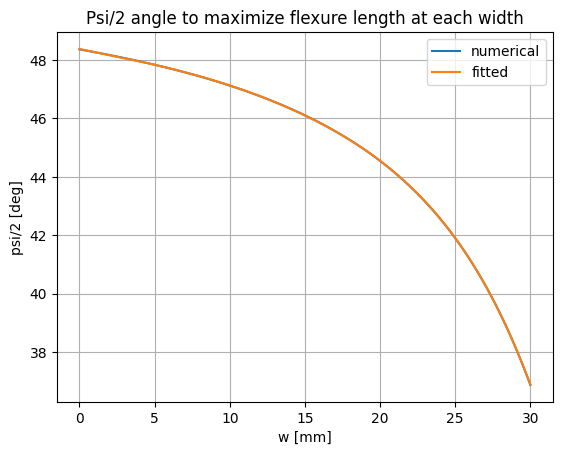

psi/2 exact = 47.84
psi/2 approx. = 47.84


w*sin(psi) + (3*lmax + 0.2)*cos(psi) - 44

[ 1.76547624e-07 -8.61638908e-06  1.75338392e-04 -1.08178817e-03
 -4.10698635e-01  2.20071461e+01]
['0.00000017655', '-0.0000086164', '0.00017534', '-0.0010818', '-0.4107', '22.007']


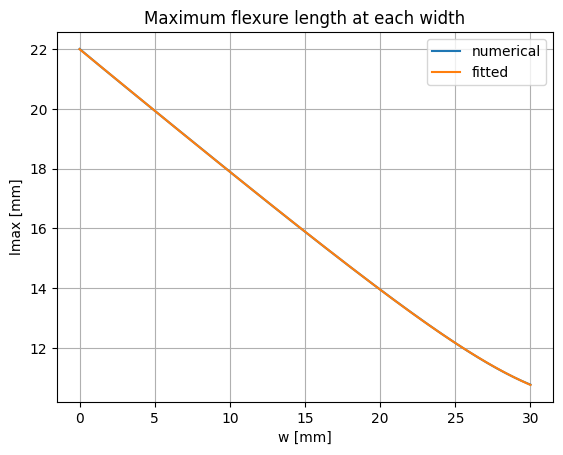

lmax exact = 19.94
lmax approx. = 19.94


w*cos(psi)/2 + 0.5

[ 1.55344845e-07 -6.51976354e-06  1.40579636e-04 -3.78784789e-04
  3.35027174e-01  4.98204092e-01]
['0.00000015534', '-0.0000065198', '0.00014058', '-0.00037878', '0.33503', '0.49820']


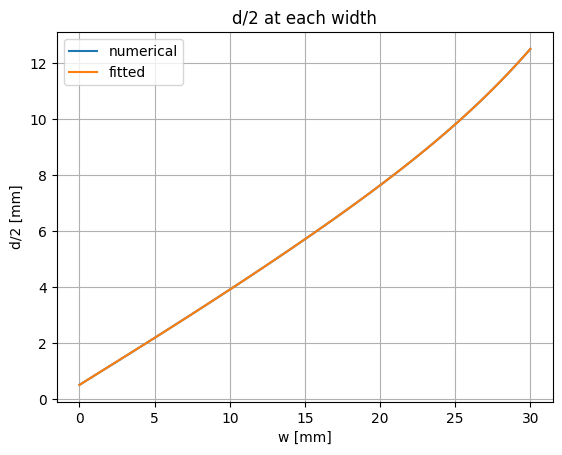

d/2 exact.= 2.18
d/2 arrpox. = 2.18


In [26]:
def func(e,h,psi_order,lmax_order,d_order,wt):
    w, psi, lmax, d = sym.symbols('w psi lmax d')
    
    #eqn = -psi + sym.atan((-50+w/2*sym.cos(psi)+0.5)/(-44-w/2*sym.sin(psi)))
    eqn = -psi + sym.atan((49.5 - w)/(44-w*sym.sin(psi)))
    display(eqn)
    psi_inst = []
    w0 = np.linspace(0,30,200)
    for i in w0:
        psi_inst.append(sym.nsolve(eqn.subs(w,i),psi,0.785))
    psi_inst = np.array(psi_inst)
    psi_inst = np.asarray(psi_inst, dtype=float)
    psi_inst = psi_inst*180/np.pi
    poly_coeff = np.polyfit(w0,psi_inst,psi_order)
    test_poly = np.polyval(poly_coeff, w0)
    print(poly_coeff)
    print([np.format_float_positional(i, precision=5, unique=False, fractional=False, trim='k') for i in poly_coeff])
    #print(test_poly)
    w0.tofile('w0.csv', sep = ',')
    psi_inst.tofile('psi_inst.csv', sep = ',')
    plt.plot(w0, psi_inst, label='numerical')
    plt.plot(w0, test_poly, label='fitted')
    plt.xlabel('w [mm]')
    plt.ylabel('psi/2 [deg]')
    plt.title('Psi/2 angle to maximize flexure length at each width')
    plt.grid(True)
    plt.legend()
    plt.show()
    print(f"psi/2 exact = {sym.nsolve(eqn.subs({w:wt}), psi, 0.725)*180/np.pi:.2f}")
    print(f"psi/2 approx. = {np.polyval(poly_coeff, wt):.2f}")
    #print(w0)
    #print(psi_inst)
    
    #height
    height_inst = []
    height_eqn = -h + 21 + w*sym.sin(psi)+(3*lmax + 2*e)*sym.cos(psi)
    display(height_eqn)
    for i in w0:
        psi_inter = np.polyval(poly_coeff, i)*np.pi/180
        height_inst.append(sym.nsolve(height_eqn.subs({w:i, psi: psi_inter}),lmax,20))
    height_inst = np.array(height_inst)
    height_inst = np.asarray(height_inst, dtype=float)
    poly_coeff_h = np.polyfit(w0,height_inst,lmax_order)
    test_poly_h = np.polyval(poly_coeff_h, w0)
    print(poly_coeff_h)
    print([np.format_float_positional(i, precision=5, unique=False, fractional=False, trim='k') for i in poly_coeff_h])
    height_inst.tofile('height_inst.csv', sep = ',')
    plt.plot(w0, height_inst, label = 'numerical')
    plt.plot(w0, test_poly_h, label='fitted')
    plt.xlabel('w [mm]')
    plt.ylabel('lmax [mm]')
    plt.title('Maximum flexure length at each width')
    plt.grid(True)
    plt.legend()
    plt.show()
    #print(w0)
    #print(height_inst)
    print(f"lmax exact = {sym.nsolve(height_eqn.subs({w: wt, psi: np.polyval(poly_coeff, wt) * np.pi / 180}), lmax, 20):.2f}")
    print(f"lmax approx. = {np.polyval(poly_coeff_h, wt):.2f}")
    
    #d
    d_inst = []
    d_eqn = w/2*sym.cos(psi)+0.5
    display(d_eqn)
    for i in w0:
        psi_inter = np.polyval(poly_coeff, i)*np.pi/180
        d_inst.append(d_eqn.subs({w:i, psi: psi_inter}))
    d_inst = np.array(d_inst)
    d_inst = np.asarray(d_inst, dtype=float)
    poly_coeff_d = np.polyfit(w0,d_inst,d_order)
    test_poly_d = np.polyval(poly_coeff_d, w0)
    print(poly_coeff_d)
    print([np.format_float_positional(i, precision=5, unique=False, fractional=False, trim='k') for i in poly_coeff_d])
    d_inst.tofile('d_inst.csv', sep = ',')
    plt.plot(w0, d_inst, label = 'numerical')
    plt.plot(w0, test_poly_d, label='fitted')
    plt.xlabel('w [mm]')
    plt.ylabel('d/2 [mm]')
    plt.title('d/2 at each width')
    plt.grid(True)
    plt.legend()
    plt.show()
    #print(w0)
    #print(d_inst)
    print(f"d/2 exact.= {d_eqn.subs({w:wt, psi: np.polyval(poly_coeff, wt)*np.pi/180}):.2f}")
    print(f"d/2 arrpox. = {np.polyval(poly_coeff_d, wt):.2f}")
    
func(e = 0.1, h = 65, psi_order = 5, lmax_order = 5, d_order = 5, wt = 5)